# Project: TMDB Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDB (The Movie DataBase) is a dataset that contains data about movies. These data were collected from the community. Each movie has some interesting attributes such as:
<ul>
    <li>original title </li>
    <li>genres</li>
    <li>cast</li>
    <li>director</li>
    <li>release year</li>
    <li>budget</li>
    <li>revenue</li>
    <li>rating
</ul>
To get an insight on the different data patterns, I'll try to breakdown the dataset and answer some question, such as:
<ol>
    <li>Which genres are most popular from year to year?
    <li>Most popular actor from year to year?
    <li>Did movies with higher vote count received a better rating?
    <li>What kinds of properties are associated with movies that have high revenues?
    <li>How did the number of film production changed over time?
</ol>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [26]:
# load the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
# more info about data types of columns, missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [28]:
# Investigate the shape of dataset
df.shape

(10866, 21)

In [29]:
# check for duplicates in data set, and count them if exists
sum(df.duplicated())

1

In [30]:
#To understand the statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Initial Impression of Data

The dataset contains some columns that aren't useful for my investigation. To simplify the analysis, I'll remove these columns:
    1. imdb_id
    2. homepage
    3. tagline
    4. release_date
    5. overview
    6. keywords
    


Upon a deeper look into the dataset, there're movies with some important values such as budget, and revenue set to 0. This is unrealistic and can't be analyized. Thus, any movie with 0 value in one, or more of these columns ("budget_adj", "revenue_adj", "budget", "revenue", "runtime") will be removed.

Additionally, columns ("cast", "directors", "genres", "production_companies") have enteries seperated by "|". These could be problematic when trying to extract the different entities within one entery. Thus, the entities in one entery will be seperated into different columns to ease the data exploration process.

## Data Cleaning

In [31]:
# Removing the irrelevant columns
df.drop(['imdb_id','homepage','tagline','release_date','keywords','overview'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

In [32]:
#Removing the duplicate entery, and check again
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [33]:
#Replace all the films with 0 values in the specified columns to NaN values, then remove all NaN enteries from the dataset
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
df.dropna(axis=0, inplace=True)

In [34]:
#Split the colums into seperate ones (split by '|')
#reference: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

cast_df = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast{x+1}"))
dir_df = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director{x+1}"))
gen_df = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre{x+1}"))
prod_df = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_company{x+1}"))

In [35]:
#Updating the dataset
df = df.join([cast_df, gen_df, prod_df, dir_df])
df = df.drop(['cast', 'director', 'genres', 'production_companies'], axis=1)

In [36]:
#Check the new shape of the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3805 non-null   int64  
 1   popularity           3805 non-null   float64
 2   budget               3805 non-null   float64
 3   revenue              3805 non-null   float64
 4   original_title       3805 non-null   object 
 5   runtime              3805 non-null   float64
 6   vote_count           3805 non-null   int64  
 7   vote_average         3805 non-null   float64
 8   release_year         3805 non-null   int64  
 9   budget_adj           3805 non-null   float64
 10  revenue_adj          3805 non-null   float64
 11  cast1                3805 non-null   object 
 12  cast2                3802 non-null   object 
 13  cast3                3802 non-null   object 
 14  cast4                3794 non-null   object 
 15  cast5                3776 non-null   

(3805, 38)

## Exploratory Data Analysis

### Question 1: Which genres are most popular from year to year?

In [37]:
#Determine most popular genres each year
#create a dataframe containing all generes columns
gen_year_df = df.loc[:, 'genre1': 'genre5']
#add the release_date to the dataframe
gen_year_df = gen_year_df.join(df['release_year'])
#identify the unique release years
years = gen_year_df['release_year'].unique()
#empty typles list to carry the popular genre for every year
pop_gen = []
for year in years:
    #create a new df with only films where their release year is equal to the iterating year 
    year_df = gen_year_df[gen_year_df['release_year']==year]
    #remove column release_year
    year_df = year_df.drop(['release_year'], axis = 1)
    #find the most recurring genre entry
    most_pop = year_df.stack().value_counts().idxmax() 
    
    pop_gen.append((year, most_pop))
    
#Create a dataframe to show the sorted "year - popular genre" tuples
pop_df = pd.DataFrame(pop_gen, columns=['Year','Most popular genre']).sort_values('Year').reset_index().drop(['index'], axis=1)
pop_df

,Year,Most popular genre
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,Thriller
4,1964,Drama
5,1965,Drama
6,1966,Action
7,1967,Drama
8,1968,Drama
9,1969,Western


'Drama' seems to be predominantly the most popular genre throughout the years. 

### Question 2: Most popular actor from year to year?

In [38]:
#Same as the previous process
cast_year_df = df.loc[:, 'cast1': 'cast5']
cast_year_df = cast_year_df.join(df['release_year'])
years = cast_year_df['release_year'].unique()
pop_cast = []
for year in years:
    year_df = cast_year_df[cast_year_df['release_year']==year] 
    year_df = year_df.drop(['release_year'], axis = 1)
    most_pop = year_df.stack().value_counts().idxmax() 
    
    pop_cast.append((year, most_pop))
    
pop_df = pd.DataFrame(pop_cast, columns=['Year','Most popular actor']).sort_values('Year').reset_index().drop(['index'], axis=1)
pop_df

,Year,Most popular actor
0,1960,Kirk Douglas
1,1961,Ben Johnson
2,1962,Karl Malden
3,1963,Richard Attenborough
4,1964,Sean Connery
5,1965,Claudine Auger
6,1966,John Wayne
7,1967,Sidney Poitier
8,1968,Maurice Evans
9,1969,Sylvia Miles


The table shows some of the biggest names in Hollywood, and when were they most popular.

### Question 3:  Did movies with higher vote count received a better rating?

Text(0, 0.5, 'Vote Average')

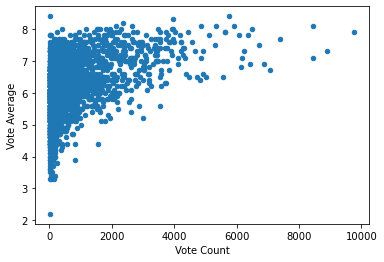

In [17]:
df_vote = df.loc[:, 'vote_count' : 'vote_average']

df_vote.plot(x='vote_count', y='vote_average', kind='scatter')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')

It's hard to deduce a relationship from this graph, we can check the correlation value

In [18]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.389853
vote_average,0.389853,1.000000


The corrolation is 0.39 which is a "moderate to low" correlation. It seems like vote count doesn't hold a strong effect on the vote average.

### Question 4: What kinds of properties are associated with movies that have high revenues?

In [19]:
#Define movies with high revenues as : movies with revenue higher than the mean of revenues and higher than its own budget 
rev_df = df
rev_df['revenue_adj'].mean()

138715934.34610373

In [20]:
rev_df = df.query('revenue_adj >= 138715934.34610373' and 'revenue_adj >=budget_adj')

In [43]:
#For the high revenue films
#Find the most frequent director
director = rev_df.loc[:, 'director1': 'director5']
pop_dir = director.stack().value_counts().idxmax()

#find the most frequent cast member
cast = rev_df.loc[:, 'cast1': 'cast5']
pop_cast = cast.stack().value_counts().idxmax()

#find the most frequent genre
gen = rev_df.loc[:, 'genre1': 'genre5']
pop_gen = gen.stack().value_counts().idxmax()

#find the most frequent production company
prod = rev_df.loc[:, 'production_company1': 'production_company5']
pop_prod = prod.stack().value_counts().idxmax()

#find the most frequent release year
release_year = rev_df['release_year'].value_counts().idxmax()

#find the avg budget
avg_budget = rev_df['budget_adj'].mean()

#find the avg vote
avg_vote = rev_df['vote_average'].mean()

#find the avg revenue
avg_rev = rev_df['revenue_adj'].mean()

In [44]:
properties = {'Popular director' : pop_dir, 
              'Popular cast' : pop_cast,
              'Popular genre' : pop_gen,
              'Production company' : pop_prod,
              'Release year' : release_year,
              'Average budget' : avg_budget,
              'Average Revenue' : avg_rev,
              'Average vote' : avg_vote}
properties

{'Popular director': 'Steven Spielberg',
 'Popular cast': 'Robert De Niro',
 'Popular genre': 'Drama',
 'Production company': 'Universal Pictures',
 'Release year': 2011,
 'Average budget': 47896613.695159525,
 'Average Revenue': 184138832.86767566,
 'Average vote': 6.293729612178333}

### Question 5: How did the number of film production changed over time?

In [23]:
years = df['release_year'].unique()
prod = []
for year in years:
    year_df = df[df['release_year']==year] 
    count = len(year_df.index) 
    
    prod.append((year, count))
    
prod_df = pd.DataFrame(prod, columns=['Year','Number of movies']).sort_values('Year').reset_index().drop(['index'], axis=1)
prod_df

,Year,Number of movies
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7
5,1965,5
6,1966,5
7,1967,13
8,1968,9
9,1969,4


Text(0, 0.5, 'Number of movies produced')

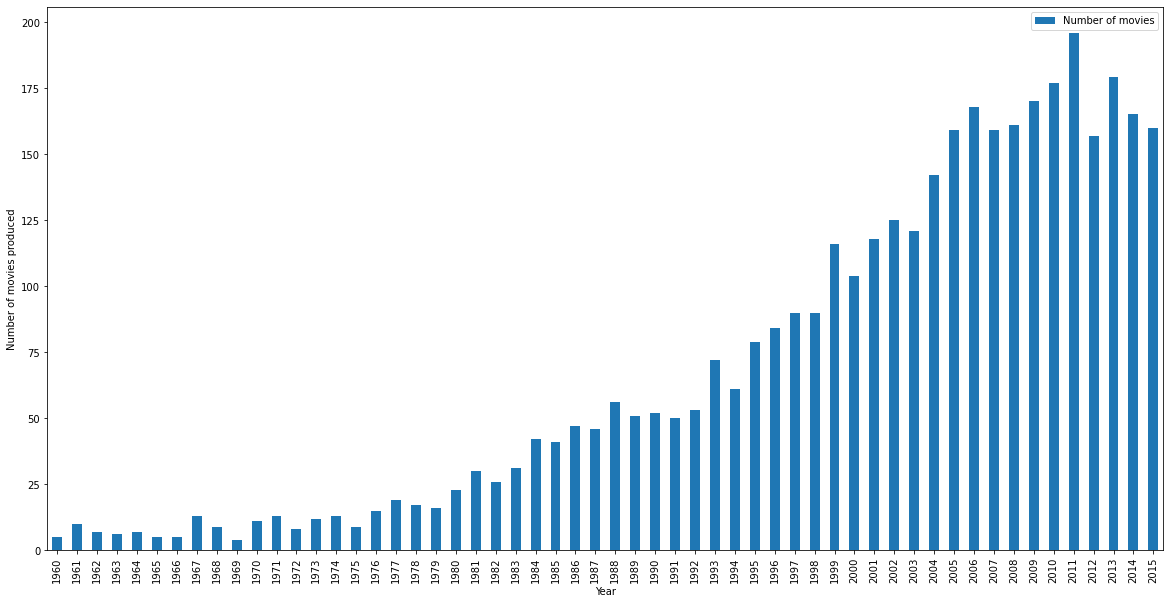

In [24]:
prod_df.plot(x='Year', y='Number of movies', kind='bar', figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Number of movies produced')

There's a constant increase with the number of movies produced annually. This makes sense, the industry is expected to grow as more people now can access movies easier than older years.

## Conclusions

Afetr cleaning the data, I was able to answer the research questions:

#### Question 1: Which genres are most popular from year to year?
Throughout the different years, 'Drama' seems to be the most popular genre.

#### Question 2: Most popular actor from year to year?
The table showed some of the biggest names in Hollywood, and when was their peak.

#### Question 3: Did movies with higher vote count received a better rating?
Not quite true. The corralation doesn't indicate a strong relationship between vote counts and higher vote average.

#### Question 4: What kinds of properties are associated with movies that have high revenues?
<table>
    <tr>
        <th>Popular director</th>
        <td>Steven Spielberg</td>
    </tr>
    <tr>
        <th>Popular actor</th>
        <td>Robert De Niro</td>
    </tr>
    <tr>
        <th>Popular genre</th>
        <td>Drama</td>
    </tr>
    <tr>
        <th>Production Company</th>
        <td>Universal Pictures</td>
    </tr>
    <tr>
        <th>Release year</th>
        <td>2011</td>
    </tr>
    <tr>
        <th>Average budget</th>
        <td>47,896,614</td>
    </tr>
    <tr>
        <th>Average Revenue</th>
        <td>184,138,833</td>
    </tr>
    <tr>
        <th>Average vote</th>
        <td>6.29</td>
    </tr>
</table>

#### Question 5: How did the number of film production changed over time?
There's a significant increase in the number of movies produced each year.

### Limitations
In the cleaning stage, many movies were discarded due to insuffecient data given. The original dataset contained 10,866 movie entry, and the cleaned data set contains 3,805; this means almost 65% of the enteries were discarded. Of course this will have an effect on all the answers found, for instance the number of movies produced each year may not accuratly represent the actual case, in case more movies from certain years were discarded than the other years.

In the revenue data, there was no normalization, exchange rate, or currency conversion considered during the nalysis. The analysis was limited to the given numerical values.